# Naive Bayes Classifier

Bernoulli NB

## Pima Indians Diabetes Data Set
URL : https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes
Original owner : National Institute of Diabetes and Digestive and Kidney Diseases

Dataset
No. of instances : 768
There are some mising values on the data set


Feature Information :

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

In the archive URL, it stated that some of the features value are taken as 0. However, it is biologically impossible to give the number 0. Here is the list of the features which biologically has to be positive value greater than 0 :

1. Blood Pressure
2. BMI

Thus, for these feature, we replace the 0 value with the mean value for each feature. 


In [26]:
#Library

import numpy as np
import pandas as pd
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.utils.extmath import safe_sparse_dot

## Loading the dataset

In [27]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['pregnant', 'glucose', 'pressure', 'skin', 'insltest', 'bmi', 'pedi', 'age', 'class']

pima_df = pd.read_csv(url, names=names)

In [28]:
pima_df.head(10)

,pregnant,glucose,pressure,skin,insltest,bmi,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [29]:
pima_shape = pima_df.shape
pima_shape

(768, 9)

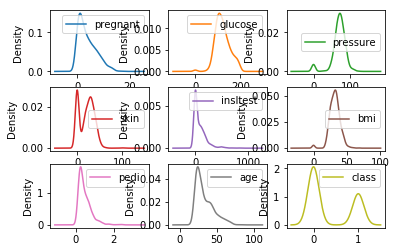

In [30]:
pima_df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

## Data Preprocessing

There are some missing values on blood pressure, insuline and skin thickness. Those missing values are written as zero. Here, we treat the missing value with the number of the $ E $ Mean value in each attribute $ X_i $

1. Replace value 0 to the mean of the following feature :
    1. Blood Pressure
    2. BMI
2. Binarize the data by each mean for the numerical value
3. Split train and test dataset

In [31]:
## Get the mean for each feature 

pima_mean = np.mean(pima_df)
pima_mean

pregnant      3.845052
glucose     120.894531
pressure     69.105469
skin         20.536458
insltest     79.799479
bmi          31.992578
pedi          0.471876
age          33.240885
class         0.348958
dtype: float64

In [32]:
'''
Replace empty value by its mean
I put the value differently since one feature is an integer and one value is a float.
'''

## Blood pressure
pima_df.iloc[:,2] = np.int_(pima_df.iloc[:,2].replace(0, pima_mean[2]))

## BMI
pima_df.iloc[:,5] = np.round(pima_df.iloc[:,5].replace(0, pima_mean[5]), 1)

In [33]:
### Binarize data

pima_array = pima_df.values

for f_idx in range(0, len(pima_mean)-1) :
    pima_array[:,f_idx] = binarize(pima_array[:,f_idx].reshape(-1,1), threshold=pima_mean[f_idx]).reshape(1,-1)
    pima_df.iloc[:,f_idx] = pima_array[:,f_idx]

pima_df.head(10)

,pregnant,glucose,pressure,skin,insltest,bmi,pedi,age,class
0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
8,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1
9,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1


In [34]:
### Train Test Split

X_pima_train, X_pima_test, y_pima_train, y_pima_test = train_test_split(pima_df.iloc[:, :8], 
                                                                        pima_df.iloc[:, 8], 
                                                                        test_size=0.30)


# Train the Dataset and Evaluate

Using the Bernoulli Naive Bayes

Variable :
1. clf\_bnb = classifief for Bernoulli NB()
2. y_pred_train = predict output
3. y_pred_proba_lg_train : the predict output w.r.t to log probability
4. y_pred_proba_train : the predict output w.r.t to probability

In [35]:
clf = BernoulliNB()
clf.fit(X_pima_train, y_pima_train)

y_pred = clf.predict(X_pima_test)
y_pred_proba = clf.predict_proba(X_pima_test)

accuracy_score(y_pred, y_pima_test)


0.68398268398268403

In [36]:
'''Get the ratio of prior probabilities P(Y=1)/P(Y=0)'''

prior_prob_ratio_ = clf.class_log_prior_[1] - clf.class_log_prior_[0]
print('ratio of prior probability')
print(prior_prob_ratio_)

ratio of prior probability
-0.726858237902


In [37]:
''' Get Evidence 
Input : X_pima_train 
X : positive data'''

X = np.copy(X_pima_test)

"P(X_i|Y) {positive and negative}"

val_X_log_prob_ = clf.feature_log_prob_
neg_X_log_prob_ = np.log(1-np.exp(val_X_log_prob_))

"log ratio of feature probability. P(X|Y=1)/P(X|Y=0) for positive and negative"
val_X_log_ratio_ = val_X_log_prob_[1, :] - val_X_log_prob_[0, :]
neg_X_log_ratio_ = neg_X_log_prob_[1, :] - neg_X_log_prob_[0, :]

print('positive ratio of F')
print(val_X_log_ratio_)
print('negative ratio of F')
print(neg_X_log_ratio_)

##########################################################################################

"Check if the ratio each is > 0 or < 0"
val_pos_X = val_X_log_ratio_ * (val_X_log_ratio_ > 0)
val_neg_X = val_X_log_ratio_ * (val_X_log_ratio_ < 0)
neg_pos_X = neg_X_log_ratio_ * (neg_X_log_ratio_ > 0)
neg_neg_X = neg_X_log_ratio_ * (neg_X_log_ratio_ < 0)

"Calculate each instances evidence in X"

val_pos_ev = safe_sparse_dot(X, val_pos_X.T)
val_neg_ev = safe_sparse_dot(X, val_neg_X.T)

neg_pos_ev = safe_sparse_dot(1-X, neg_pos_X.T)
neg_neg_ev = safe_sparse_dot(1-X, neg_neg_X.T)

pos_ev = val_pos_ev + neg_pos_ev
neg_ev = val_neg_ev + neg_neg_ev


positive ratio of F
[ 0.47588168  0.92509949  0.23359095  0.15485665  0.32827805  0.41084921
  0.3358237   0.68290429]
negative ratio of F
[-0.46542436 -0.98180785 -0.37163799 -0.20698264 -0.20341672 -0.546949
 -0.22463881 -0.52400686]


### The most positive object with respect to the probabilities.

In [38]:
most_pos_obj_idx = np.argmax(y_pred_proba[:,1])
print(most_pos_obj_idx)

37


In [39]:
print('Index of the object : ', most_pos_obj_idx)
print('Data', X[most_pos_obj_idx])
print('a) Total  positive log-evidence : ', pos_ev[most_pos_obj_idx])
print('b) Total negative log-evidence : ', neg_ev[most_pos_obj_idx])
print('c) Probability distribution', y_pred_proba[most_pos_obj_idx])

val_pos_ev = np.multiply(X[most_pos_obj_idx, :], val_pos_X.T)
val_neg_ev = np.multiply(X[most_pos_obj_idx, :], val_neg_X.T)

neg_pos_ev = np.multiply(1-X[most_pos_obj_idx, :], neg_pos_X.T)
neg_neg_ev = np.multiply(1-X[most_pos_obj_idx, :], neg_neg_X.T)

feature_pos = val_pos_ev + neg_pos_ev
pos_list = np.argsort(feature_pos)[::-1]
feature_neg = val_neg_ev + neg_neg_ev
neg_list = np.argsort(feature_neg)

print('d) Top 3 features values that contribute most to the positive evidence')
for i in range(0,3):
    print('\t',names[pos_list[i]], '\t Evidence Value : ', np.sort(feature_pos)[::-1][i])
 
print('e) Top 3 features values that contribute most to the negative evidence')
for j in range(0,3):
    print('\t',names[neg_list[j]], '\t Evidence Value : ', np.sort(feature_neg)[j])

print(np.sort(feature_pos)[::-1])     
print(np.sort(feature_neg))

Index of the object :  37
Data [ 1.  1.  1.  1.  1.  1.  1.  1.]
a) Total  positive log-evidence :  3.54728401207
b) Total negative log-evidence :  0.0
c) Probability distribution [ 0.05623033  0.94376967]
d) Top 3 features values that contribute most to the positive evidence
	 glucose 	 Evidence Value :  0.925099491406
	 age 	 Evidence Value :  0.682904288831
	 pregnant 	 Evidence Value :  0.47588167703
e) Top 3 features values that contribute most to the negative evidence
	 pregnant 	 Evidence Value :  0.0
	 glucose 	 Evidence Value :  0.0
	 pressure 	 Evidence Value :  0.0
[ 0.92509949  0.68290429  0.47588168  0.41084921  0.3358237   0.32827805
  0.23359095  0.15485665]
[ 0.  0.  0.  0.  0.  0.  0.  0.]


### The most negative object with respect to the probabilities.

In [40]:
most_neg_obj_idx = np.argmin(y_pred_proba[:,1])
print(most_neg_obj_idx)

5


In [41]:
print('Index of the object : ', most_neg_obj_idx)
print('Data', X[most_neg_obj_idx])
print('a) Total  positive log-evidence : ', pos_ev[most_neg_obj_idx])
print('b) Total negative log-evidence : ', neg_ev[most_neg_obj_idx])
print('c) Probability distribution', y_pred_proba[most_neg_obj_idx])


val_pos_ev = np.multiply(X[most_neg_obj_idx, :], val_pos_X.T)
val_neg_ev = np.multiply(X[most_neg_obj_idx, :], val_neg_X.T)

neg_pos_ev = np.multiply(1-X[most_neg_obj_idx, :], neg_pos_X.T)
neg_neg_ev = np.multiply(1-X[most_neg_obj_idx, :], neg_neg_X.T)

feature_pos = val_pos_ev + neg_pos_ev
pos_list = np.argsort(feature_pos)[::-1]
feature_neg = val_neg_ev + neg_neg_ev
neg_list = np.argsort(feature_neg)

print('d) Top 3 features values that contribute most to the positive evidence')
for i in range(0,3):
    print('\t',names[pos_list[i]], '\t Evidence Value : ', np.sort(feature_pos)[::-1][i])
 
print('e) Top 3 features values that contribute most to the negative evidence')
for j in range(0,3):
    print('\t',names[neg_list[j]], '\t Evidence Value : ', np.sort(feature_neg)[j])

print(np.sort(feature_pos)[::-1])     
print(np.sort(feature_neg))

Index of the object :  5
Data [ 0.  0.  0.  0.  0.  0.  0.  0.]
a) Total  positive log-evidence :  0.0
b) Total negative log-evidence :  -3.52486421823
c) Probability distribution [ 0.98596024  0.01403976]
d) Top 3 features values that contribute most to the positive evidence
	 age 	 Evidence Value :  0.0
	 pedi 	 Evidence Value :  0.0
	 bmi 	 Evidence Value :  0.0
e) Top 3 features values that contribute most to the negative evidence
	 glucose 	 Evidence Value :  -0.981807848149
	 bmi 	 Evidence Value :  -0.546948998926
	 age 	 Evidence Value :  -0.524006856628
[ 0.  0.  0.  0.  0.  0.  0.  0.]
[-0.98180785 -0.546949   -0.52400686 -0.46542436 -0.37163799 -0.22463881
 -0.20698264 -0.20341672]


### The object that has the largest positive evidence.

In [42]:
most_pos_ev_idx = np.argmax(pos_ev)

In [43]:
print('Index of the object : ', most_pos_ev_idx)
print('Data', X[most_pos_ev_idx])
print('a) Total  positive log-evidence : ', pos_ev[most_pos_ev_idx])
print('b) Total negative log-evidence : ', neg_ev[most_pos_ev_idx])
print('c) Probability distribution', y_pred_proba[most_pos_ev_idx])

val_pos_ev = np.multiply(X[most_pos_ev_idx, :], val_pos_X.T)
val_neg_ev = np.multiply(X[most_pos_ev_idx, :], val_neg_X.T)

neg_pos_ev = np.multiply(1-X[most_pos_ev_idx, :], neg_pos_X.T)
neg_neg_ev = np.multiply(1-X[most_pos_ev_idx, :], neg_neg_X.T)

feature_pos = val_pos_ev + neg_pos_ev
pos_list = np.argsort(feature_pos)[::-1]
feature_neg = val_neg_ev + neg_neg_ev
neg_list = np.argsort(feature_neg)

print('d) Top 3 features values that contribute most to the positive evidence')
for i in range(0,3):
    print('\t',names[pos_list[i]], '\t Evidence Value : ', np.sort(feature_pos)[::-1][i])
 
print('e) Top 3 features values that contribute most to the negative evidence')
for j in range(0,3):
    print('\t',names[neg_list[j]], '\t Evidence Value : ', np.sort(feature_neg)[j])

print(np.sort(feature_pos)[::-1])     
print(np.sort(feature_neg))

Index of the object :  37
Data [ 1.  1.  1.  1.  1.  1.  1.  1.]
a) Total  positive log-evidence :  3.54728401207
b) Total negative log-evidence :  0.0
c) Probability distribution [ 0.05623033  0.94376967]
d) Top 3 features values that contribute most to the positive evidence
	 glucose 	 Evidence Value :  0.925099491406
	 age 	 Evidence Value :  0.682904288831
	 pregnant 	 Evidence Value :  0.47588167703
e) Top 3 features values that contribute most to the negative evidence
	 pregnant 	 Evidence Value :  0.0
	 glucose 	 Evidence Value :  0.0
	 pressure 	 Evidence Value :  0.0
[ 0.92509949  0.68290429  0.47588168  0.41084921  0.3358237   0.32827805
  0.23359095  0.15485665]
[ 0.  0.  0.  0.  0.  0.  0.  0.]


### The object that has the largest negative evidence.

In [44]:
most_neg_ev_idx = np.argmin(neg_ev)

In [45]:
print('Index of the object : ', most_neg_ev_idx)
print('Data', X[most_neg_ev_idx])
print('a) Total  positive log-evidence : ', pos_ev[most_neg_ev_idx])
print('b) Total negative log-evidence : ', neg_ev[most_neg_ev_idx])
print('c) Probability distribution', y_pred_proba[most_neg_ev_idx])


val_pos_ev = np.multiply(X[most_neg_ev_idx, :], val_pos_X.T)
val_neg_ev = np.multiply(X[most_neg_ev_idx, :], val_neg_X.T)

neg_pos_ev = np.multiply(1-X[most_neg_ev_idx, :], neg_pos_X.T)
neg_neg_ev = np.multiply(1-X[most_neg_ev_idx, :], neg_neg_X.T)

feature_pos = val_pos_ev + neg_pos_ev
pos_list = np.argsort(feature_pos)[::-1]
feature_neg = val_neg_ev + neg_neg_ev
neg_list = np.argsort(feature_neg)

print('d) Top 3 features values that contribute most to the positive evidence')
for i in range(0,3):
    print('\t',names[pos_list[i]], '\t Evidence Value : ', np.sort(feature_pos)[::-1][i])
 
print('e) Top 3 features values that contribute most to the negative evidence')
for j in range(0,3):
    print('\t',names[neg_list[j]], '\t Evidence Value : ', np.sort(feature_neg)[j])

print()     


Index of the object :  5
Data [ 0.  0.  0.  0.  0.  0.  0.  0.]
a) Total  positive log-evidence :  0.0
b) Total negative log-evidence :  -3.52486421823
c) Probability distribution [ 0.98596024  0.01403976]
d) Top 3 features values that contribute most to the positive evidence
	 age 	 Evidence Value :  0.0
	 pedi 	 Evidence Value :  0.0
	 bmi 	 Evidence Value :  0.0
e) Top 3 features values that contribute most to the negative evidence
	 glucose 	 Evidence Value :  -0.981807848149
	 bmi 	 Evidence Value :  -0.546948998926
	 age 	 Evidence Value :  -0.524006856628



### The most uncertain object with respect to the probabilities.

In [46]:
uncertain_idx = np.argmin(np.square(y_pred_proba[:,1]-0.5))

In [47]:
print('Index of the object : ', uncertain_idx)
print('Data', X[uncertain_idx, :])
print('a) Total  positive log-evidence : ', pos_ev[uncertain_idx])
print('b) Total negative log-evidence : ', neg_ev[uncertain_idx])
print('c) Probability distribution', y_pred_proba[uncertain_idx])


val_pos_ev = np.multiply(X[uncertain_idx, :], val_pos_X.T)
val_neg_ev = np.multiply(X[uncertain_idx, :], val_neg_X.T)

neg_pos_ev = np.multiply(1-X[uncertain_idx, :], neg_pos_X.T)
neg_neg_ev = np.multiply(1-X[uncertain_idx, :], neg_neg_X.T)

feature_pos = val_pos_ev + neg_pos_ev
pos_list = np.argsort(feature_pos)[::-1]
feature_neg = val_neg_ev + neg_neg_ev
neg_list = np.argsort(feature_neg)

print('d) Top 3 features values that contribute most to the positive evidence')
for i in range(0,3):
    print('\t',names[pos_list[i]], '\t Evidence Value : ', np.sort(feature_pos)[::-1][i])
    
print('e) Top 3 features values that contribute most to the negative evidence')
for j in range(0,3):
    print('\t',names[neg_list[j]], '\t Evidence Value : ', np.sort(feature_neg)[j])

Index of the object :  136
Data [ 1.  0.  1.  0.  0.  1.  1.  1.]
a) Total  positive log-evidence :  2.13904982267
b) Total negative log-evidence :  -1.39220720762
c) Probability distribution [ 0.49500407  0.50499593]
d) Top 3 features values that contribute most to the positive evidence
	 age 	 Evidence Value :  0.682904288831
	 pregnant 	 Evidence Value :  0.47588167703
	 bmi 	 Evidence Value :  0.410849206759
e) Top 3 features values that contribute most to the negative evidence
	 glucose 	 Evidence Value :  -0.981807848149
	 skin 	 Evidence Value :  -0.206982636574
	 insltest 	 Evidence Value :  -0.203416722894
